# Importing data and libraries

In [137]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['retina'] 

In [ ]:
info_patents = pd.read_pickle("../info_patents")

In [192]:
info_companies = pd.read_csv("./Data/info_companies.csv")

In [150]:
info_companies

,assignee_id,assignee_organization,assignee_type,assignee_lastknown_country,assignee_total_num_patents,assignee_total_num_inventors,nb_marked_patents,proportion_marked_patents
0,067e1110-7638-4840-8dfb-cc9434d518f1,INSTITUT PASTEUR,3,FR,821,1098,2,0.002
1,075fddd9-f31f-410e-a474-b4bb2283ef7e,Quinton Instrument Company,2,US,50,63,4,0.080
2,07dba387-b236-4355-bbfc-a2c33873f7a7,Cosmar Corporation,2,US,9,11,1,0.111
3,07ff496c-cec2-416d-9b5a-13a6fbd03c38,"Varitronic Systems, Inc.",2,US,18,16,1,0.056
4,0f63d31a-dac4-4326-afe8-e0d9ca77e826,SHIMADZU CORPORATION,3,JP,2479,1596,100,0.040
...,...,...,...,...,...,...,...,...
2293,f0e041be-a8f1-4d48-a61a-c61599c4c1e8,"Forever Holdings, Inc.",2,US,18,12,1,0.056
2294,f406fe97-781d-4e57-baef-b85a0bec5db5,"Mangata, LLC",2,US,5,1,3,0.600
2295,fc7bd073-509e-4aeb-8f54-676f32956397,"Ryft Systems, Inc.",2,US,4,16,1,0.250
2296,fdd256e2-bbaa-4063-a960-6b0f0e0307b6,"NuVasive Specialized Orthopedics, Inc.",2,US,34,46,2,0.059


# Getting proportion of marked patents over unmarked for each company

In [151]:
list_companies = list(info_companies.assignee_id)
dict_companies = {key:0 for key in list_companies}

for section in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    dict_companies = {key:0 for key in list_companies}
    for el in info_patents[info_patents[section]==1].assignee_id:
        if el!=None:
            for idi in el:
                if idi != None:
                    dict_companies[idi]+=1
    
    info_companies[section]=info_companies.assignee_id.map(dict_companies)

#info_companies['proportion_marked_patents']=(info_companies.nb_marked_patents/info_companies.assignee_total_num_patents).round(3)

info_companies

,assignee_id,assignee_organization,assignee_type,assignee_lastknown_country,assignee_total_num_patents,assignee_total_num_inventors,nb_marked_patents,proportion_marked_patents,A,B,C,D,E,F,G,H
0,067e1110-7638-4840-8dfb-cc9434d518f1,INSTITUT PASTEUR,3,FR,821,1098,2,0.002,377,7,630,0,0,0,145,0
1,075fddd9-f31f-410e-a474-b4bb2283ef7e,Quinton Instrument Company,2,US,50,63,4,0.080,42,1,0,0,0,0,3,3
2,07dba387-b236-4355-bbfc-a2c33873f7a7,Cosmar Corporation,2,US,9,11,1,0.111,1,0,0,0,0,0,0,0
3,07ff496c-cec2-416d-9b5a-13a6fbd03c38,"Varitronic Systems, Inc.",2,US,18,16,1,0.056,0,10,0,0,0,0,0,0
4,0f63d31a-dac4-4326-afe8-e0d9ca77e826,SHIMADZU CORPORATION,3,JP,2479,1596,100,0.040,269,312,153,6,1,199,1343,782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,f0e041be-a8f1-4d48-a61a-c61599c4c1e8,"Forever Holdings, Inc.",2,US,18,12,1,0.056,1,4,0,0,0,1,0,1
2294,f406fe97-781d-4e57-baef-b85a0bec5db5,"Mangata, LLC",2,US,5,1,3,0.600,4,0,0,0,0,3,0,0
2295,fc7bd073-509e-4aeb-8f54-676f32956397,"Ryft Systems, Inc.",2,US,4,16,1,0.250,0,0,0,0,0,0,4,0
2296,fdd256e2-bbaa-4063-a960-6b0f0e0307b6,"NuVasive Specialized Orthopedics, Inc.",2,US,34,46,2,0.059,34,0,0,0,0,0,0,2


In [152]:
#info_companies.to_csv('./Data/info_companies.csv',index=False)

[]

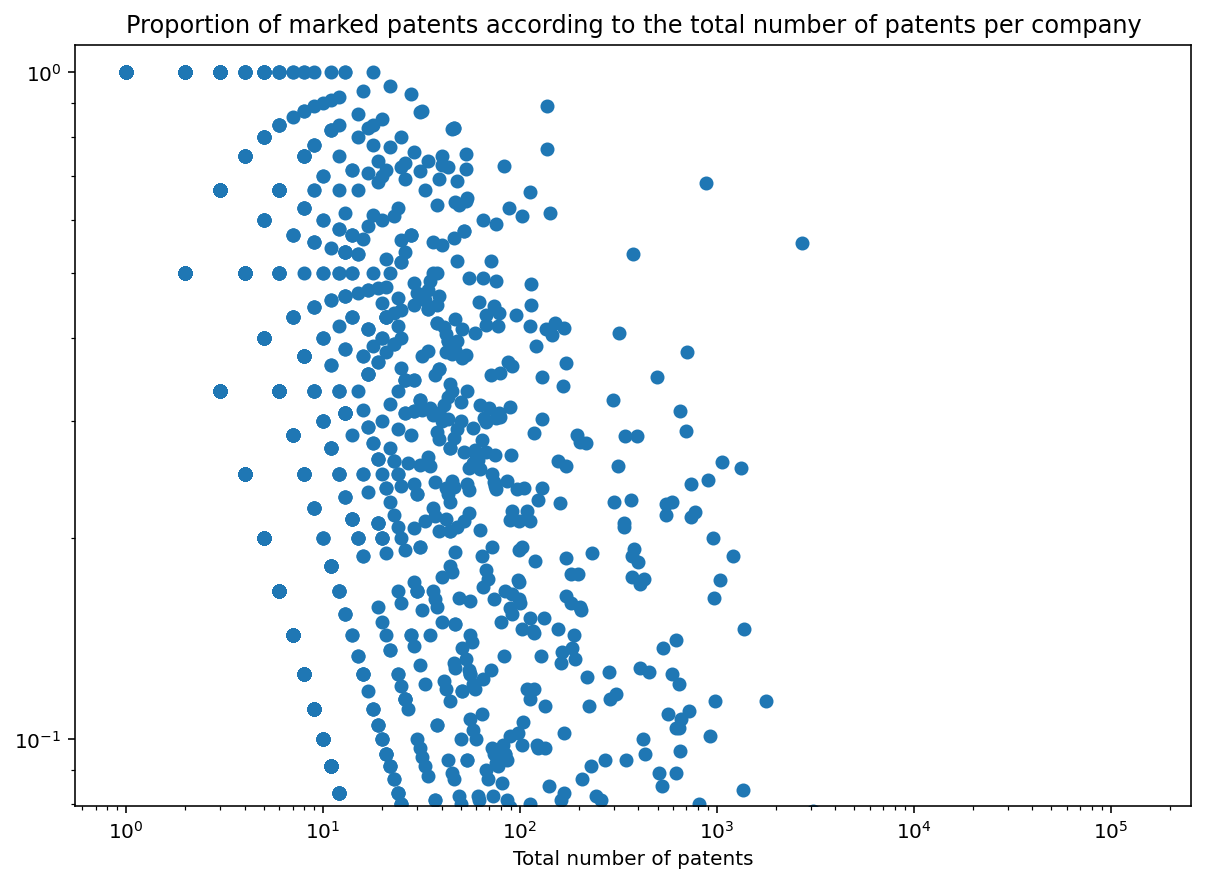

In [131]:
plt.figure(figsize=(10,7))
plt.scatter(info_companies.assignee_total_num_patents,info_companies.proportion_marked_patents,marker = 'o',label='proportion of marked patents')
plt.xscale('log')
plt.yscale('log')
plt.ylim(top=1.1)
plt.xlabel('Total number of patents')
plt.title("Proportion of marked patents according to the total number of patents per company")
plt.plot()

In [111]:
mean_prop = []

In [112]:
for el in list(np.unique(info_companies.assignee_total_num_patents)):
    tmp = np.mean(info_companies[info_companies.assignee_total_num_patents==el].proportion_marked_patents)
    mean_prop.append(tmp)

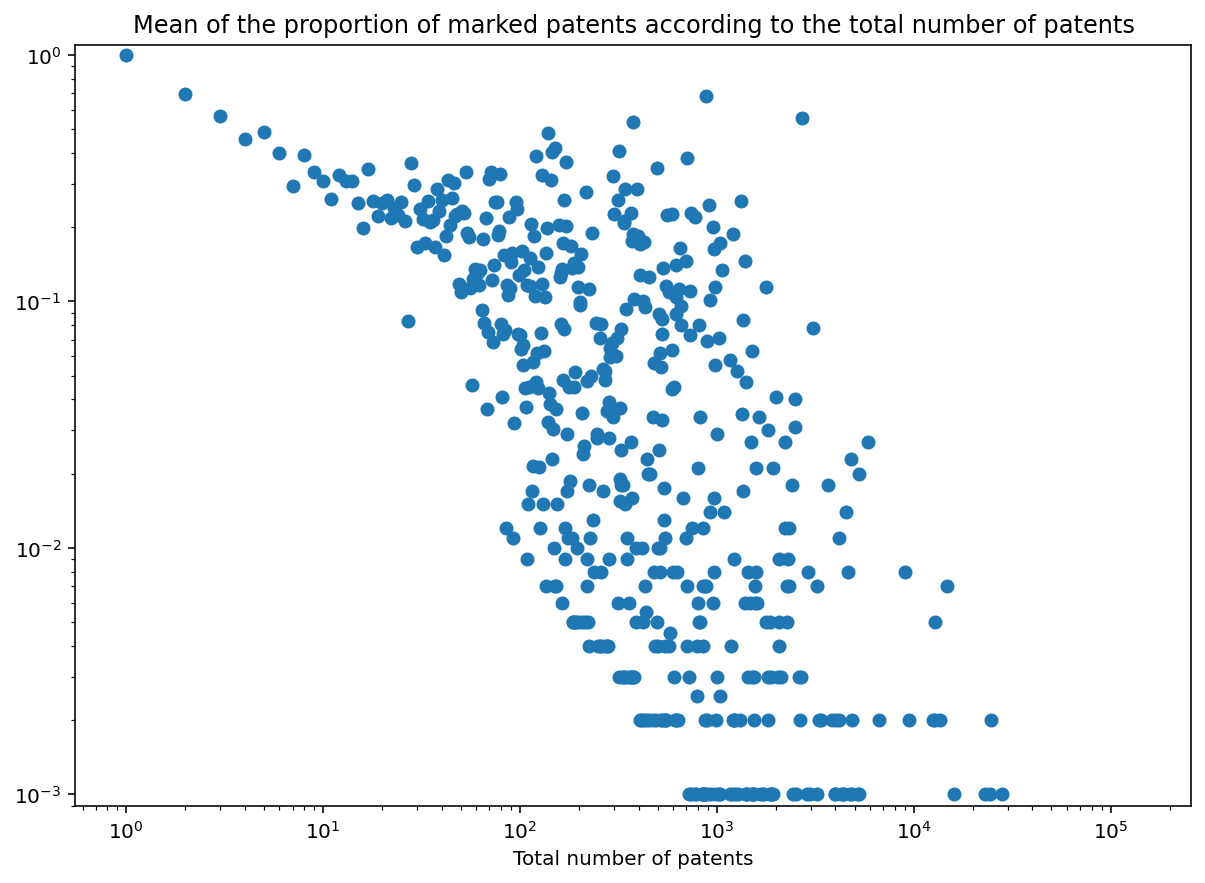

In [189]:
plt.figure(figsize=(10,7))
plt.scatter(list(np.unique(info_companies.assignee_total_num_patents)),mean_prop)
plt.xscale('log')
plt.yscale('log')
plt.ylim(top=1.1,bottom=0.0009)
plt.xlabel('Total number of patents')
plt.title('Mean of the proportion of marked patents according to the total number of patents')
plt.show()

Text(0.5, 1.0, 'Proportion of marked patents according to the total number of inventors for a given company')

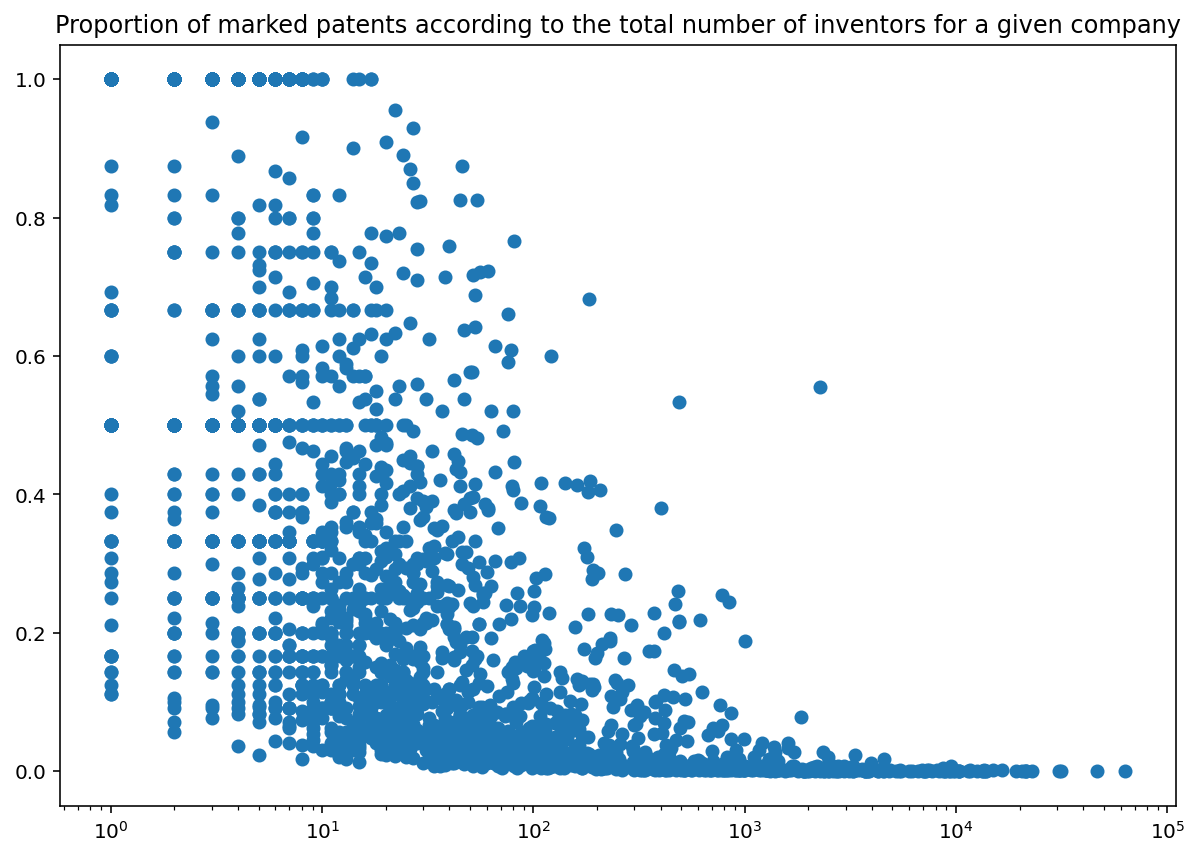

In [209]:
plt.figure(figsize=(10,7))
plt.scatter(info_companies.assignee_total_num_inventors,info_companies.proportion_marked_patents)
plt.xscale('log')
plt.title('Proportion of marked patents according to the total number of inventors for a given company')

[]

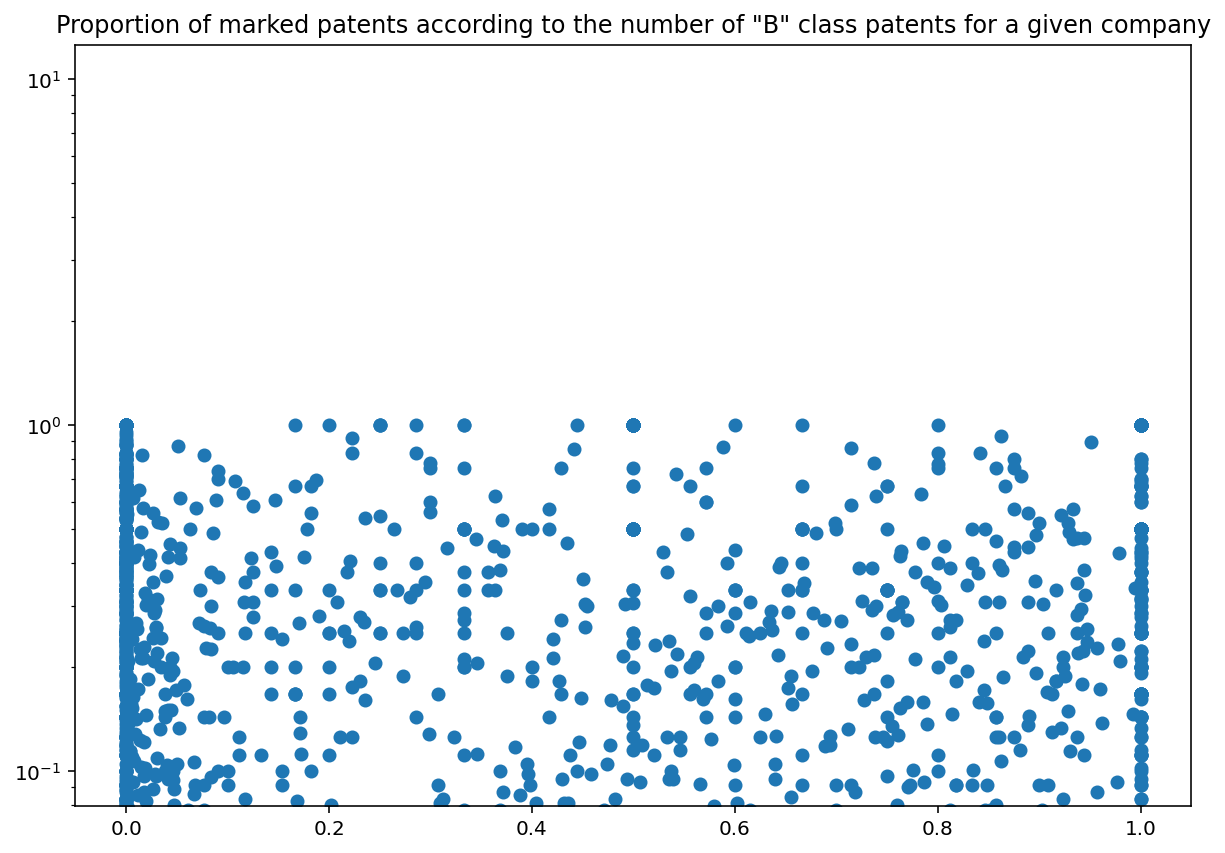

In [207]:
plt.figure(figsize=(10,7))
plt.scatter(info_companies.A/np.sum(info_companies[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']],axis=1),info_companies.proportion_marked_patents)
plt.yscale('log')
plt.title('Proportion of marked patents according to the number of "B" class patents for a given company')
plt.plot()

# Cleaning the df of info_patents

In [143]:
info_patents = info_patents.dropna()

mlb = MultiLabelBinarizer()
dummies = pd.DataFrame(mlb.fit_transform(info_patents.ipc_section),columns=mlb.classes_, index=info_patents.index)
dummies = dummies[['A','B','C','D','E','F','G','H']]

for el in list(dummies.columns):
    info_patents[el]=dummies[el]

patents_to_drop = info_patents[(info_patents.A==0) & (info_patents.B==0) & (info_patents.C==0) & (info_patents.D==0) & (info_patents.E==0) & (info_patents.F==0) & (info_patents.G==0) & (info_patents.H==0)].patent_number
info_patents_red = info_patents[~info_patents.patent_number.isin(list(patents_to_drop))]
#info_patents_red = info_patents_red[info_patents_red.patent_processing_time.apply(lambda x: str(x).isdigit())].reset_index(drop=True)

/Users/gregoirebellan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
info_patents = info_patents_red.reset_index(drop=True)

In [147]:
info_patents

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked,A,B,C,D,E,F,G,H
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0,1,0,1,0,0,0,0,0
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0,0,0,0,0,0,0,0,1
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0,0,0,0,0,0,0,1,0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0,0,0,0,0,0,0,1,0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823827,8386822,2013-02-26,1852,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1823828,4192319,1980-03-11,893,[A],[fa543ac8-5ee8-4999-b949-6c8a3dbae65d],[13],0.0,1,0,0,0,0,0,0,0
1823829,8386739,2013-02-26,1247,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1823830,4191891,1980-03-04,481,[H],[f2d3dc32-b29c-4c55-ab6d-736b4ee8b96b],[13],0.0,0,0,0,0,0,0,0,1


In [18]:
ipc_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
repartition_marked = []
repartition_unmarked = []
repartition_total = []

for index, el in enumerate(ipc_class):
    nb_marked = info_patents[info_patents.marked==1][el].value_counts()[1]
    nb_unmarked = info_patents[info_patents.marked==0][el].value_counts()[1]
    repartition_marked.append(nb_marked)
    repartition_unmarked.append(nb_unmarked)
    repartition_total.append(nb_marked+nb_unmarked)

In [19]:
np.sum(repartition_total)

1592034

<BarContainer object of 8 artists>

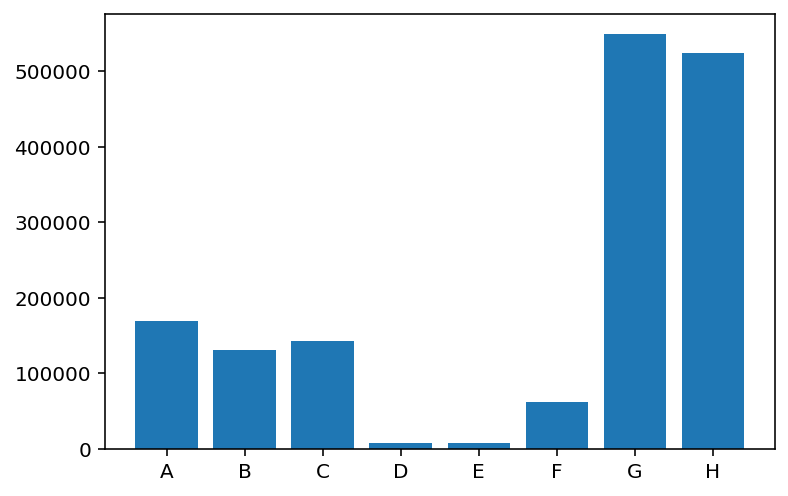

In [22]:
plt.bar(ipc_class,repartition_total)